In [271]:
import sncosmo

In [289]:
import numpy as np
import pandas as pd
import sncosmo
import pylab as pl
from astropy.table import Table
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [290]:
t = np.arange(0,100,0.1)
obsi = Table({'time': t,
             'band': ['desi']*len(t),
             'gain': [1.]*len(t),
             'skynoise': [180.]*len(t),
             'zp': [50.]*len(t),
             'zpsys':['ab']*len(t)})

In [291]:
obsr = Table({'time': t,
             'band': ['desr']*len(t),
             'gain': [1.]*len(t),
             'skynoise': [180.]*len(t),
             'zp': [50.]*len(t),
             'zpsys':['ab']*len(t)})

In [292]:
obsg = Table({'time': t,
             'band': ['desg']*len(t),
             'gain': [1.]*len(t),
             'skynoise': [180.]*len(t),
             'zp': [50.]*len(t),
             'zpsys':['ab']*len(t)})
print (obsg)

        time        band gain skynoise  zp  zpsys
------------------- ---- ---- -------- ---- -----
                0.0 desg  1.0    180.0 50.0    ab
                0.1 desg  1.0    180.0 50.0    ab
                0.2 desg  1.0    180.0 50.0    ab
0.30000000000000004 desg  1.0    180.0 50.0    ab
                0.4 desg  1.0    180.0 50.0    ab
                0.5 desg  1.0    180.0 50.0    ab
 0.6000000000000001 desg  1.0    180.0 50.0    ab
 0.7000000000000001 desg  1.0    180.0 50.0    ab
                0.8 desg  1.0    180.0 50.0    ab
                0.9 desg  1.0    180.0 50.0    ab
                ...  ...  ...      ...  ...   ...
               98.9 desg  1.0    180.0 50.0    ab
               99.0 desg  1.0    180.0 50.0    ab
  99.10000000000001 desg  1.0    180.0 50.0    ab
               99.2 desg  1.0    180.0 50.0    ab
  99.30000000000001 desg  1.0    180.0 50.0    ab
               99.4 desg  1.0    180.0 50.0    ab
               99.5 desg  1.0    180.0 50.0    ab


In [293]:
model = sncosmo.Model(source='salt2')
params = {'z': 0.4, 
          't0': 30.0, 'x0':1.e-5, 'x1': 0.1, 'c': 0.}

In [294]:
lcsg = sncosmo.realize_lcs(obsg, model, [params])
lcsr = sncosmo.realize_lcs(obsr, model, [params])
lcsi = sncosmo.realize_lcs(obsi, model, [params])

lcsg = lcsg[0].to_pandas()
lcsg['flux'] = lcsg.flux.apply(lambda x: max(x, 
                            min(np.abs(lcsg.flux.values))))
lcsr = lcsr[0].to_pandas()
lcsr['flux'] = lcsr.flux.apply(lambda x: max(x, 
                            min(np.abs(lcsr.flux.values))))
lcsi = lcsi[0].to_pandas()
lcsi['flux'] = lcsi.flux.apply(lambda x: max(x, 
                            min(np.abs(lcsi.flux.values))))

In [295]:
lcsg[lcsg.flux == lcsg.flux.max()], \
lcsr[lcsr.flux == lcsr.flux.max()], \
lcsi[lcsi.flux == lcsi.flux.max()], 

(     time  band          flux        fluxerr    zp zpsys
 261  26.1  desg  4.537068e+10  213003.943611  50.0    ab,
      time  band          flux        fluxerr    zp zpsys
 293  29.3  desr  8.449381e+10  290677.932489  50.0    ab,
      time  band          flux        fluxerr    zp zpsys
 315  31.5  desi  8.247490e+10  287183.721986  50.0    ab)

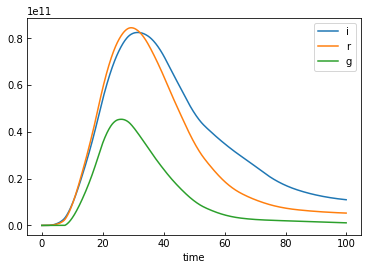

In [296]:
ax = lcsi.plot(x="time", y="flux", label='i')
lcsr.plot(x="time", y="flux", ax=ax, label='r')
lcsg.plot(x="time", y="flux", ax=ax, label='g')

In [297]:
r = -2.5 * np.log10(lcsr['flux'].values)
g = -2.5 * np.log10(lcsg['flux'].values)
i = -2.5 * np.log10(lcsi['flux'].values)
t = lcsr['time'].values

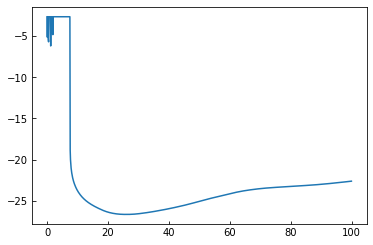

In [298]:
pl.plot(t, g, label='g')

(0, 10)

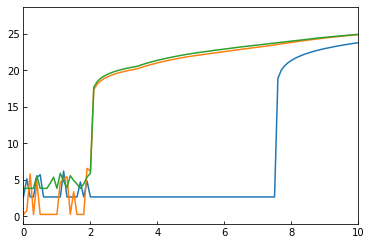

In [299]:
pl.plot(lcsr['time'].values, 
        2.5 * np.log10(lcsg['flux'].values))
pl.plot(lcsr['time'].values, 
        2.5 * np.log10(lcsr['flux'].values))
pl.plot(lcsr['time'].values, 
        2.5 * np.log10(lcsi['flux'].values))
pl.xlim(0,10)

In [300]:
lcsr = lcsr.iloc[22:]
lcsi = lcsi.iloc[22:]
lcsg = lcsg.iloc[80:]

In [301]:
lcsr['mag'] = -2.5 * np.log10(lcsr.flux)
lcsr['mag'] -= lcsr['mag'].min()
lcsr['time'] -= lcsg[lcsg.flux == lcsg.flux.max()]['time'].values

lcsi['mag'] = -2.5 * np.log10(lcsi.flux)
lcsi['mag'] -= lcsi['mag'].min()
lcsi['time'] -= lcsg[lcsg.flux == lcsg.flux.max()]['time'].values

lcsg['mag'] = -2.5 * np.log10(lcsg.flux)
lcsg['mag'] -= lcsg['mag'].min()
lcsg['time'] -= lcsg[lcsg.flux == lcsg.flux.max()]['time'].values



In [302]:
lcsr.time - lcsr[lcsr.flux == lcsr.flux.max()]['time'].values

22    -27.1
23    -27.0
24    -26.9
25    -26.8
26    -26.7
27    -26.6
28    -26.5
29    -26.4
30    -26.3
31    -26.2
32    -26.1
33    -26.0
34    -25.9
35    -25.8
36    -25.7
37    -25.6
38    -25.5
39    -25.4
40    -25.3
41    -25.2
42    -25.1
43    -25.0
44    -24.9
45    -24.8
46    -24.7
47    -24.6
48    -24.5
49    -24.4
50    -24.3
51    -24.2
       ... 
970    67.7
971    67.8
972    67.9
973    68.0
974    68.1
975    68.2
976    68.3
977    68.4
978    68.5
979    68.6
980    68.7
981    68.8
982    68.9
983    69.0
984    69.1
985    69.2
986    69.3
987    69.4
988    69.5
989    69.6
990    69.7
991    69.8
992    69.9
993    70.0
994    70.1
995    70.2
996    70.3
997    70.4
998    70.5
999    70.6
Name: time, Length: 978, dtype: float64

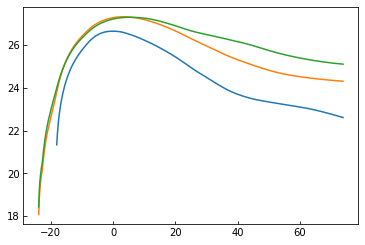

In [303]:
pl.plot(lcsg['time'].values, 
        2.5 * np.log10(lcsg['flux'].values))
pl.plot(lcsr['time'].values, 
        2.5 * np.log10(lcsr['flux'].values))
pl.plot(lcsr['time'].values, 
        2.5 * np.log10(lcsi['flux'].values))


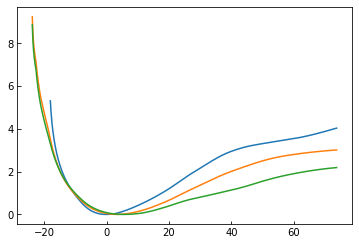

In [306]:
pl.plot(lcsg['time'].values, 
        lcsg['mag'].values)
pl.plot(lcsr['time'].values, 
        lcsr['mag'].values)
pl.plot(lcsr['time'].values, 
        lcsi['mag'].values)


In [307]:
lcsg.to_csv("snIag.csv", index=False)
lcsr.to_csv("snIar.csv", index=False)
lcsi.to_csv("snIai.csv", index=False)
